In [8]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Ok lets import our pickle data from our last module**

In [9]:
os.getcwd()
one_level_up = os.path.dirname(os.getcwd())
df = pd.read_pickle(one_level_up + '\\data\\processed\\09122020_tweets_vectorize.pkl')
df.head()


,politican,Party,TS,sentiment_score,10 hero,10 hero never,10 pump,10 pump 15,10 senator,10 senator vote,...,youre see youre,youve,youve never,youve never seen,zuckerberg,zuckerberg billionaire,zuckerberg billionaire outrageous,zuckerbergs,zuckerbergs wealth,zuckerbergs wealth surpass
0,Lisa Murkowski,R,9.79,0.7650,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Lisa Murkowski,R,8.44,0.4215,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Lisa Murkowski,R,10.98,0.8316,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Lisa Murkowski,R,9.63,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Lisa Murkowski,R,10.16,0.6705,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**now we will drop the leaders and convert the D = 0 and R = 1** 

In [10]:
dem_leaders = ['Joe Biden', 'Bernard Sanders','Kamala D. Harris', 'Elizabeth Warren']
rep_leaders = ['Mitch McConnell','Mike Pence','Donald Trump','Ted Cruz' ]

leaders = dem_leaders +rep_leaders
leaders

['Joe Biden',
 'Bernard Sanders',
 'Kamala D. Harris',
 'Elizabeth Warren',
 'Mitch McConnell',
 'Mike Pence',
 'Donald Trump',
 'Ted Cruz']

In [11]:
df = df[df['politican'].isin(leaders) == False]
df = df[df['Party'] != 'I']
party_code  = {'R':1, 'D':0}

df['Party'] = df['Party'].replace(party_code)
df

,politican,Party,TS,sentiment_score,10 hero,10 hero never,10 pump,10 pump 15,10 senator,10 senator vote,...,youre see youre,youve,youve never,youve never seen,zuckerberg,zuckerberg billionaire,zuckerberg billionaire outrageous,zuckerbergs,zuckerbergs wealth,zuckerbergs wealth surpass
0,Lisa Murkowski,1,9.79,0.7650,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Lisa Murkowski,1,8.44,0.4215,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Lisa Murkowski,1,10.98,0.8316,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Lisa Murkowski,1,9.63,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Lisa Murkowski,1,10.16,0.6705,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16754,Michael B. Enzi,1,7.00,-0.1994,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16755,Michael B. Enzi,1,5.77,0.7712,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16756,Michael B. Enzi,1,10.05,0.4939,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16757,Michael B. Enzi,1,1.25,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**OK there are a lot of vector here. Lets see if we can do a PCA and make the feature dimension smaller so it doesn't take a bit toll on our machine**

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 30)
pca.fit_transform(df.iloc[:,4:])

array([[ 0.39175457, -0.02261785, -0.16965992, ..., -0.02329263,
         0.03764015, -0.01342646],
       [-0.00909349, -0.00572251, -0.00247472, ..., -0.00174584,
        -0.00428759, -0.00296747],
       [-0.00914166, -0.00571975, -0.00319263, ...,  0.00290693,
        -0.00260094, -0.01542133],
       ...,
       [-0.00853632, -0.00662135, -0.00379934, ...,  0.00511794,
         0.00465459, -0.00792118],
       [-0.00318165,  0.00527482, -0.00134289, ..., -0.00364018,
        -0.0027271 ,  0.02630303],
       [-0.01270108,  0.00549593, -0.01313211, ...,  0.03362642,
         0.04483222, -0.02473863]])

Text(0.5, 0, 'Principle Component')

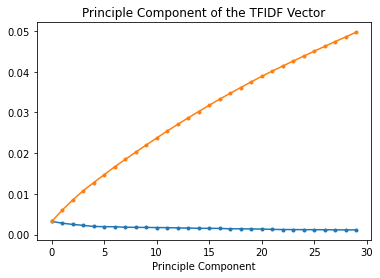

In [6]:
###  ok in general dimension reduction is not very helpful when it comes to text generations
plt.plot(range(0,30),pca.explained_variance_, marker ='.')
plt.plot(range(0,30),np.cumsum(pca.explained_variance_), marker ='.')
plt.title('Principle Component of the TFIDF Vector')
plt.xlabel('Principle Component')
#plt.xticks(np.arange(0,20))

**Now lets split the politican tweet to train and test set**

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = df.drop(['politican','Party'], axis = 1)
y = df.Party

X_train, X_test, y_train, y_test = train_test_split(X,y , train_size = 0.75, test_size = 0.25)

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [9]:
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score
evaluation_score = []
for c in range(1,5,1):
    svc_model = LinearSVC(C = c)
    svc_model.fit(X_train, y_train)
    evaluation_score.append(svc_model.score(X_train, y_train)) #0.814 for LinearSVC 0.808 with scaler
    y_pred = svc_model.predict(X_test)
    evaluation_score.append(accuracy_score(y_test, y_pred)) #0.700 for LinearSVC 0.66 with scaler


C:\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [10]:
print(evaluation_score)

[0.8083700440528634, 0.6617534942820839, 0.794730599796679, 0.6556543837357052, 0.7846492714334125, 0.6576874205844981, 0.7741443578447984, 0.652858958068615]


**The result from the just the training data looks pretty good**

**ok the test dataset is a much lower than the train result.  Here, we will probably use some optimization of hyperparameter to see if we can optimize it**

In [11]:
# svc_model.fit(X,y)
# y_pred = svc_model.predict(X)

In [12]:

# result_df = df[['politican','Party']]
# result_df['pred'] = y_pred

# party_code_rev  = {1:'R', 0:'D'}


# result_df['pred'] = result_df['pred'].replace(party_code_rev)
# result_df['Party'] = result_df['Party'].replace(party_code_rev)

# result_df['value'] = 1
# result_df.groupby(['politican', 'Party','pred']).sum().to_excel(one_level_up + '\\data\\09122020_final.xls')


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import scipy.stats as stats

#param_grid = {'n_estimators':np.arange(10,220,50), 'criterion':['gini','entropy'], 'min_samples_leaf': np.arange(1,6,2)
#             , 'max_depth': np.arange(10,220, 5)}


param_grid = {'n_estimators':stats.randint(1,200), 'criterion':['gini','entropy']
              , 'min_samples_leaf':stats.randint(1,6), 'max_depth': stats.randint(10,100)}

RF_model = RandomForestClassifier()
RF_model_cv = RandomizedSearchCV(RF_model, param_grid, cv = 5, n_iter = 60, n_jobs = 4)
RF_model_cv.fit(X_train, y_train)
y_pred = RF_model_cv.predict(X_test)


print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(RF_model_cv.best_estimator_)